In [1]:
# NOT SAFE TO DO 
import warnings
warnings.filterwarnings("ignore")

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
only_us_merged = pd.read_csv('imdb_cleaned/Data/imdb_cleaned_final.csv')
only_us_merged.head()

,tconst,ordering_x,nconst,category,primary_name,primary_profession,known_for_titles,directors,writers,averagerating,...,original_language,popularity,release_date_y,vote_average,vote_count,genre_id,studio,year,Domestic Net Profit,Worldwide Net Profit
0,tt1226229,3,nm0005253,actress,Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
1,tt1226229,10,nm1015867,composer,Lyle Workman,"composer,soundtrack,music_department","tt0829482,tt0405422,tt0800039,tt1068680",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
2,tt1226229,1,nm1706767,actor,Jonah Hill,"actor,producer,writer","tt1232829,tt2294449,tt1210166,tt0993846",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
3,tt1226229,2,nm1258970,actor,Russell Brand,"actor,producer,writer","tt1334512,tt1336608,tt1226229,tt0800039",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
4,tt1226229,4,nm0126284,actress,Rose Byrne,"actress,soundtrack,producer","tt1591095,tt2004420,tt3079380,tt1478338",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875


# Removing duplicates from `tconst`

In [4]:
only_us_merged.drop_duplicates(subset= 'tconst',  inplace = True)
only_us_merged.head()

,tconst,ordering_x,nconst,category,primary_name,primary_profession,known_for_titles,directors,writers,averagerating,...,original_language,popularity,release_date_y,vote_average,vote_count,genre_id,studio,year,Domestic Net Profit,Worldwide Net Profit
0,tt1226229,3,nm0005253,actress,Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
10,tt1403865,10,nm0005683,cinematographer,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884","nm0001053,nm0001054","nm0001054,nm0001053,nm0692427",7.6,...,en,13.118,2010-12-22,7.2,2816,18.0,Par.,2010,136243005,217276928
40,tt1637688,9,nm0005683,cinematographer,Roger Deakins,"cinematographer,camera_department,miscellaneous","tt1856101,tt0116282,tt1074638,tt3397884",nm0629272,nm0629272,6.7,...,en,18.912,2011-10-28,6.8,6245,28.0,Fox,2011,2553932,130103952
70,tt1075747,1,nm0000982,actor,Josh Brolin,"actor,producer,writer","tt4154756,tt1175491,tt0477348,tt1791528",nm0371755,"nm0004410,nm0962729,nm1109098,nm2445025,nm1441218",4.7,...,en,13.467,2010-06-18,4.6,708,28.0,WB,2010,-36452883,-35977304
120,tt1182350,3,nm0000982,actor,Josh Brolin,"actor,producer,writer","tt4154756,tt1175491,tt0477348,tt1791528",nm0000095,nm0000095,6.3,...,en,6.209,2010-05-23,5.8,431,35.0,SPC,2010,-11752184,19247816


# Graphing `Runtime` vs `Worldwide Net Profit`

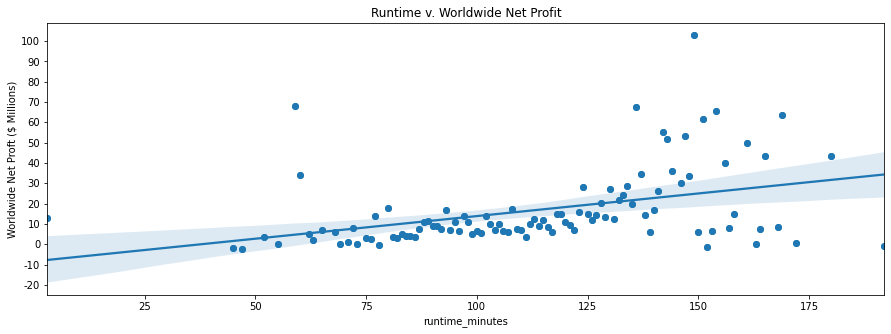

In [5]:
fig, ax = plt.subplots(figsize = (15,5))

x = only_us_merged.groupby('runtime_minutes')['Worldwide Net Profit'].mean().sort_values(ascending = False).index
y = only_us_merged.groupby('runtime_minutes')['Worldwide Net Profit'].mean().sort_values(ascending = False).values

ax.scatter(x,y)
ax.set_xlabel('Runtime in min')
ax.set_ylabel('Worldwide Net Proft ($ Millions)')
ax.set_title('Runtime v. Worldwide Net Profit')
ax.set_yticks(range(-200000000,2000000000, 100000000))
ax.set_yticklabels(range(-20,200,10))

sns.regplot(x,y);

## Correlation between the two variables

In [6]:
only_us_merged.corr()['runtime_minutes']['Worldwide Net Profit']

0.2586707786097932

# Graphing `Runtime` vs `Average Rating`

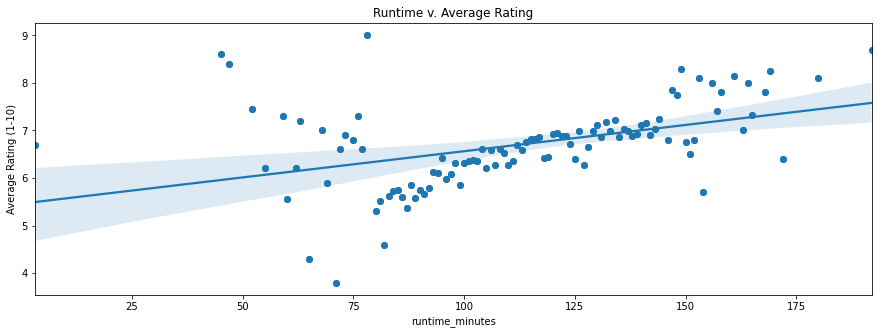

In [7]:
fig, ax = plt.subplots(figsize = (15,5))

x = only_us_merged.groupby('runtime_minutes')['averagerating'].mean().index
y = only_us_merged.groupby('runtime_minutes')['averagerating'].mean().values

ax.scatter(x,y)
ax.set_xlabel('Runtime (min)')
ax.set_ylabel('Average Rating (1-10)')
ax.set_title('Runtime v. Average Rating')

sns.regplot(x,y);

## Correlation matrix between the two variables

In [8]:
only_us_merged.corr()['runtime_minutes']['averagerating']

0.3708869904674088

# Other plots

In [9]:
# fig, ax = plt.subplots(figsize = (15,5))

# x = only_us_merged.groupby('studio')['Worldwide Net Profit'].mean().sort_values(ascending = False)[:10].index
# y = only_us_merged.groupby('studio')['Worldwide Net Profit'].mean().sort_values(ascending = False)[:10].values
# ax.set_yticks(range(-200000000,2000000000, 100000000))
# ax.set_yticklabels(range(-20,200,10))

# ax.bar(x,y)

In [20]:
only_us_merged.columns

Index(['tconst', 'ordering_x', 'nconst', 'category', 'primary_name',
       'primary_profession', 'known_for_titles', 'directors', 'writers',
       'averagerating', 'numvotes', 'primary_title', 'original_title_x',
       'start_year', 'runtime_minutes', 'genres', 'ordering_y', 'title',
       'region', 'release_date_x', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'release_month', 'release_day', 'release_year',
       'genre_ids', 'original_language', 'popularity', 'release_date_y',
       'vote_average', 'vote_count', 'genre_id', 'studio', 'year',
       'Domestic Net Profit', 'Worldwide Net Profit'],
      dtype='object')

# DROP BEFORE PUSH

''

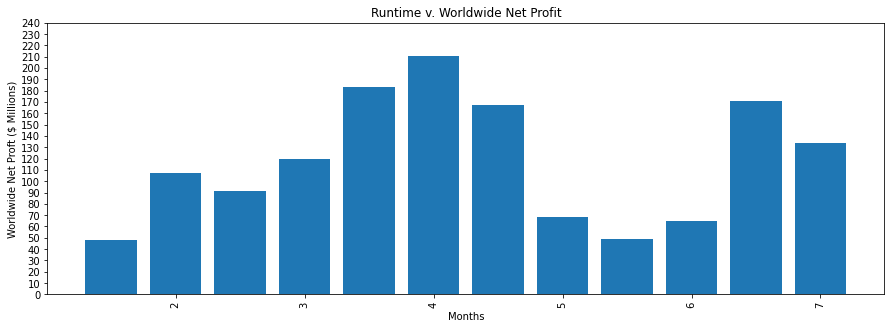

In [77]:
# fig, ax = plt.subplots(figsize = (15,5))

# x = only_us_merged.groupby('release_month')['Worldwide Net Profit'].mean().index
# y = only_us_merged.groupby('release_month')['Worldwide Net Profit'].mean().values

# ax.bar(x,y)
# ax.set_xlabel('Months')
# ax.set_ylabel('Worldwide Net Proft ($ Millions)')
# ax.set_title('Runtime v. Worldwide Net Profit')
# ax.set_xticklabels(x , rotation = 90)
# ax.set_yticks(range(0,250000000, 10000000))
# ax.set_yticklabels(range(0,250, 10))
# ;
# # sns.regplot(x,y);

''

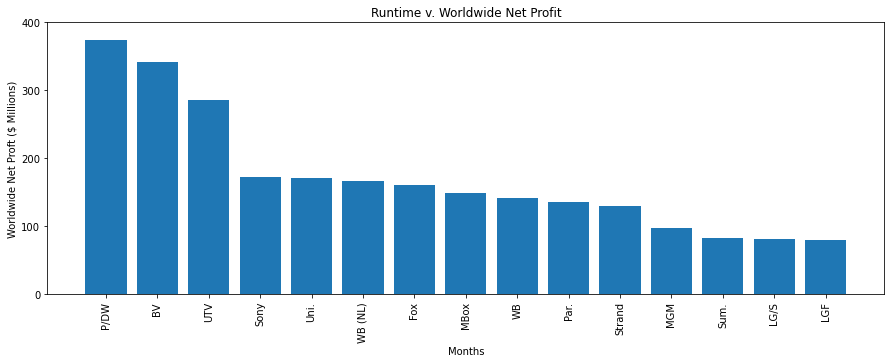

In [91]:
fig, ax = plt.subplots(figsize = (15,5))

x = only_us_merged.groupby('studio')['Worldwide Net Profit'].mean().sort_values(ascending=False)[:15].index
y = only_us_merged.groupby('studio')['Worldwide Net Profit'].mean().sort_values(ascending=False)[:15].values

ax.bar(x,y)
ax.set_xlabel('Months')
ax.set_ylabel('Worldwide Net Proft ($ Millions)')
ax.set_title('Runtime v. Worldwide Net Profit')
ax.set_xticklabels(x , rotation = 90)
ax.set_yticks(range(0,450000000, 100000000))
ax.set_yticklabels(range(0,450, 100))
;
# sns.regplot(x,y);

In [97]:
only_us_merged.studio.value_counts()[:15]

Uni.       117
Fox        111
WB         104
BV          79
Par.        72
Sony        67
LGF         60
WB (NL)     45
FoxS        37
Focus       34
Wein.       28
LG/S        26
SGem        24
ORF         23
Rela.       23
Name: studio, dtype: int64

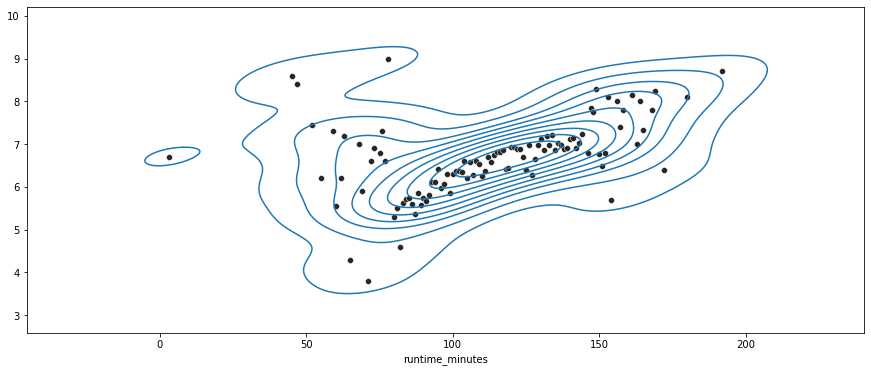

In [121]:
fig, ax = plt.subplots(figsize = (15,6))

x = only_us_merged.groupby('runtime_minutes')['averagerating'].mean().index
y = only_us_merged.groupby('runtime_minutes')['averagerating'].mean().values

sns.scatterplot(x,y, color = '0.15')
sns.kdeplot(x=x, y=y);